In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats          
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
#DATA PREPROCESSING
#Load dataset and show first five entries
zomato_rough= pd.read_csv(r'C:/Users/DELL/Desktop/Welingkar All/Welingkar Subjects and Lectures/Trimester3/Python/Zomato/zomato.csv')
zomato_rough.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#Drop unnecessary columns
zomato=zomato_rough.drop(['url','dish_liked','phone'],axis=1)

In [4]:
#Drop duplicate entires
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [5]:
#Show number of null values in the dataset
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [6]:
#Drop all the null values
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [7]:
#Rename columns listed_in(type),listed_in(city)
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [8]:
#Convert datatype of cost variable from object to string to float
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [9]:
#Convert datatype of rate variable from object to string to float
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
#Factorize columns rate, cost and votes
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

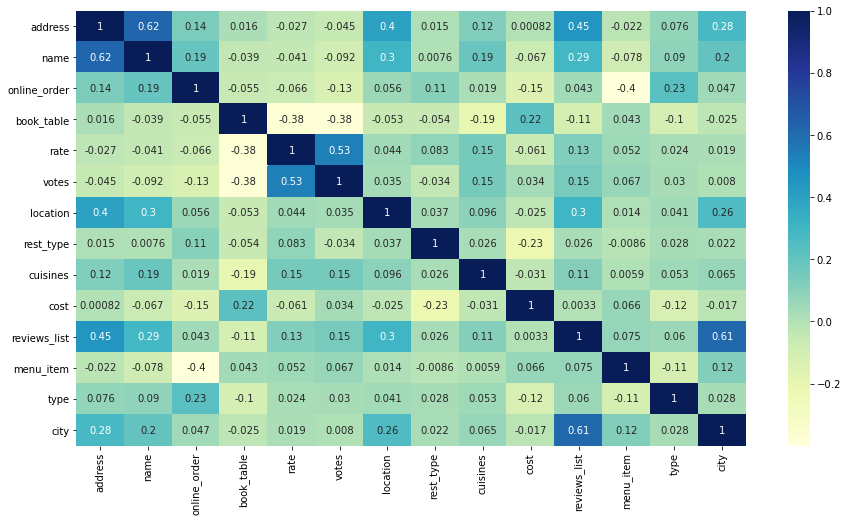

In [11]:
#Plotting correlation matrix
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
zomato_en.columns

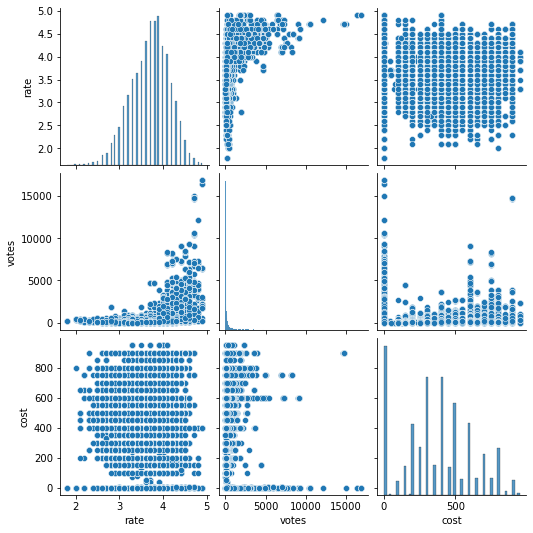

In [12]:
#Plotting pairplot
sns.pairplot(zomato)
plt.show()

Text(0.5, 1.0, 'Restaurants delivering online or Not')

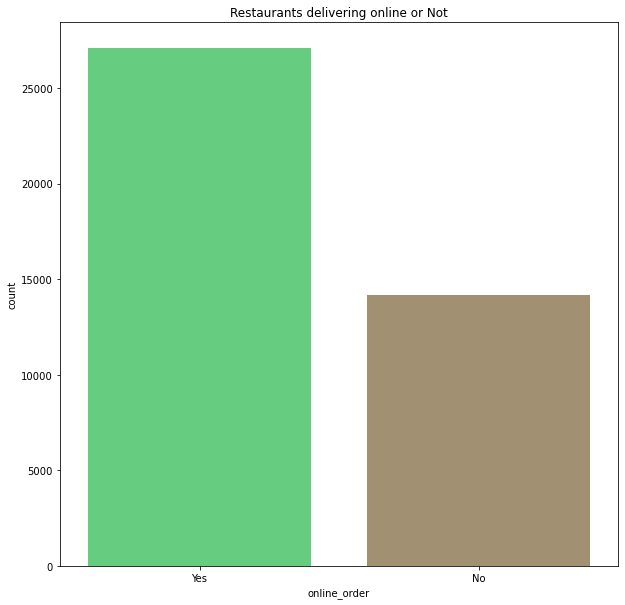

In [27]:
#EXPLORATORY DATA ANALYSIS
#Dertermining whether Restaurants deliver online or Not
sns.countplot(x="online_order",data=zomato, palette = "terrain")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Customers make table booking or not')

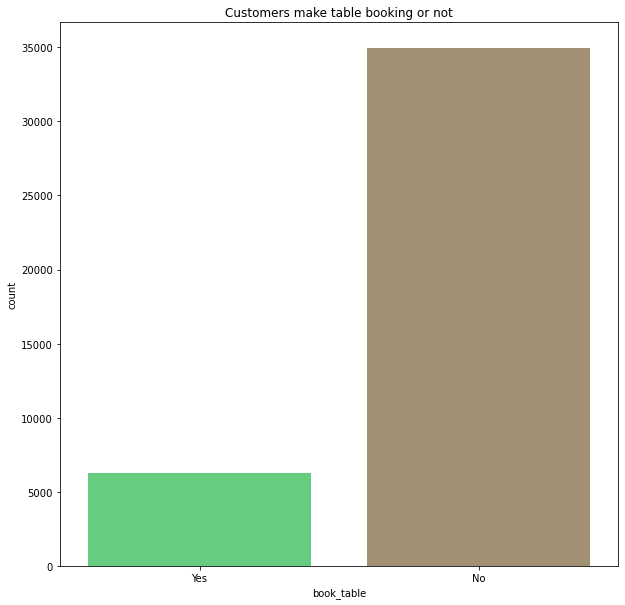

In [13]:
#Dertermining whether customers make table booking or not
sns.countplot(x="book_table",data=zomato, palette = "terrain")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Customers make table booking or not')

Text(0.5, 1.0, 'Most preffered type of Service')

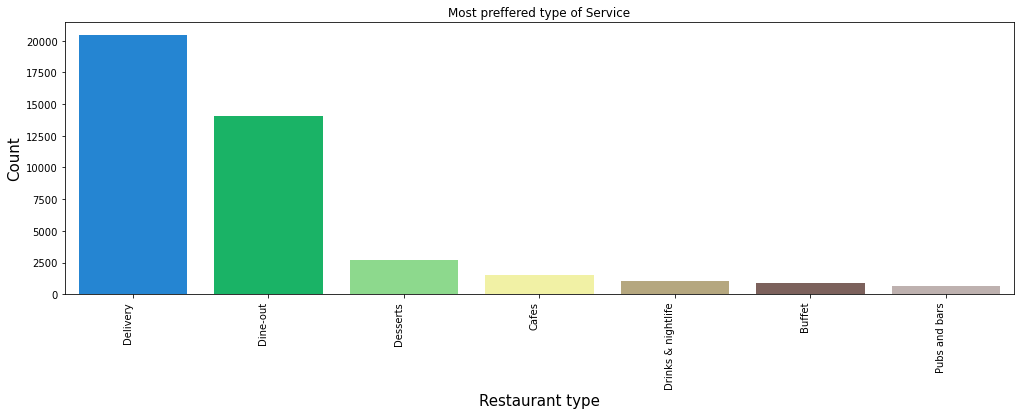

In [14]:
#Dertermining the Most preffered type of Service
fig = plt.figure(figsize=(17,5))
order = zomato['type'].value_counts(ascending=False).index
service_type = sns.countplot(x="type",data=zomato, palette = "terrain", order=order)
service_type.set_xticklabels(service_type.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Count",size=15)
plt.xlabel("Restaurant type",size=15)
service_type 
plt.title('Most preffered type of Service')

Text(0.5, 1.0, 'Most paid cost at restaurants')

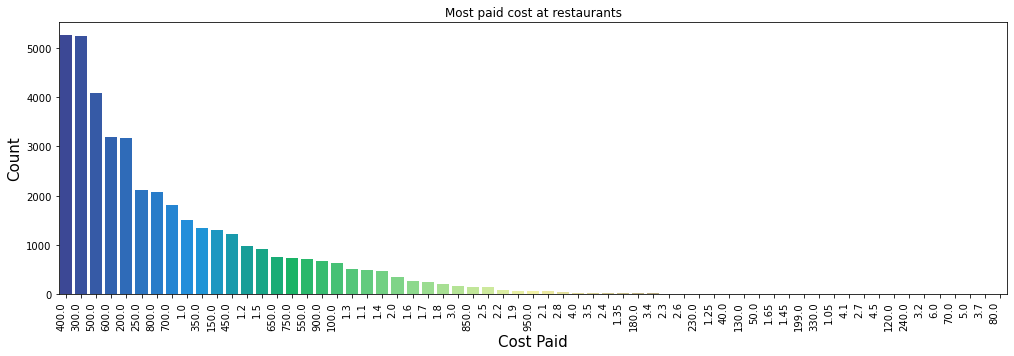

In [15]:
#Dertermining the Most paid cost at restaurants
fig = plt.figure(figsize=(17,5))
order = zomato['cost'].value_counts(ascending=False).index
cost_paid = sns.countplot(x="cost",data=zomato, palette = "terrain", order=order)
cost_paid.set_xticklabels(cost_paid.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Count",size=15)
plt.xlabel("Cost Paid",size=15)
cost_paid 
plt.title('Most paid cost at restaurants')

Text(0.5, 1.0, 'Most sought type of Restaurants')

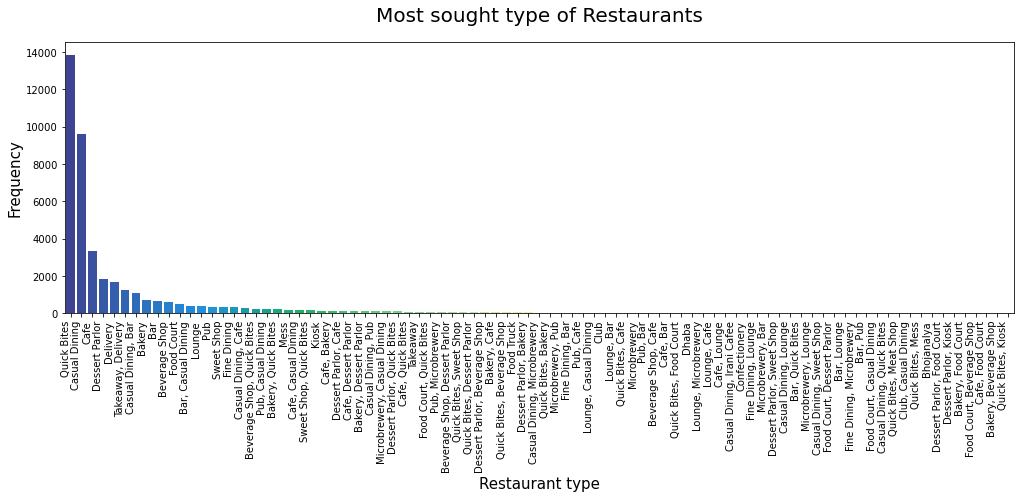

In [16]:
#Dertermining the Most sought type of Restaurants
fig = plt.figure(figsize=(17,5))
order = zomato['rest_type'].value_counts(ascending=False).index
rest = sns.countplot(x="rest_type",data=zomato, palette = "terrain", order=order)
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Most sought type of Restaurants',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

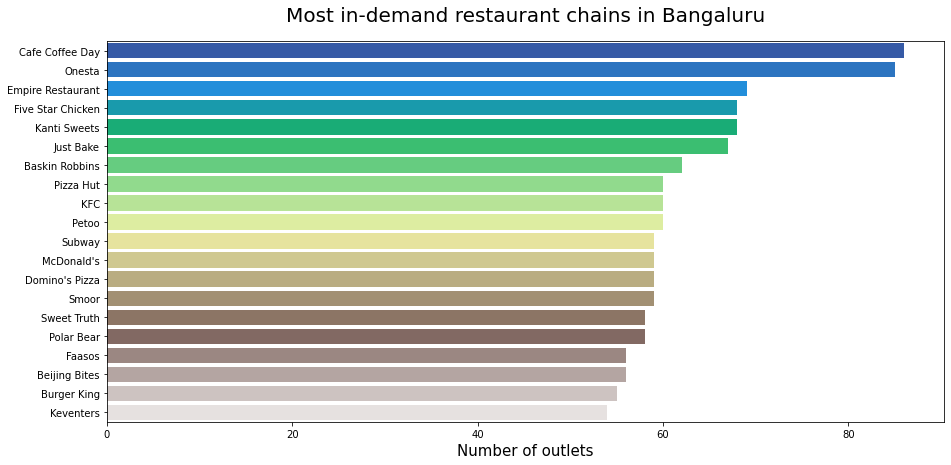

In [17]:
#Dertermining the Most in-demand restaurant chains in Bangaluru
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='terrain')
plt.title("Most in-demand restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

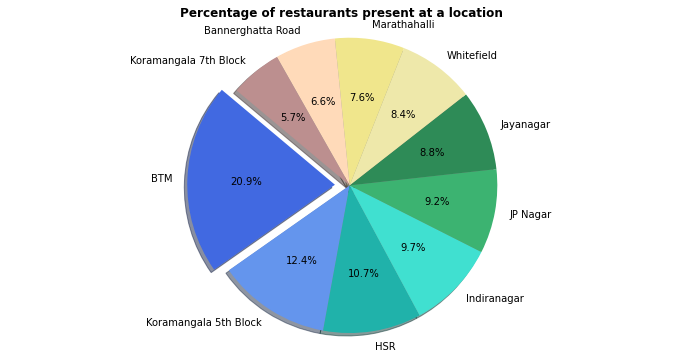

In [18]:
#Determining the the location having the maxiumum no. of restaurants
plt.figure(figsize = (12,6))
names = zomato['location'].value_counts()[:10].index
values = zomato['location'].value_counts()[:10].values
colors = ['royalblue', 'cornflowerblue','lightseagreen', 'turquoise','mediumseagreen','seagreen', 'palegoldenrod','khaki', 'peachpuff', 'rosybrown']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present at a location", weight = 'bold')
plt.show()

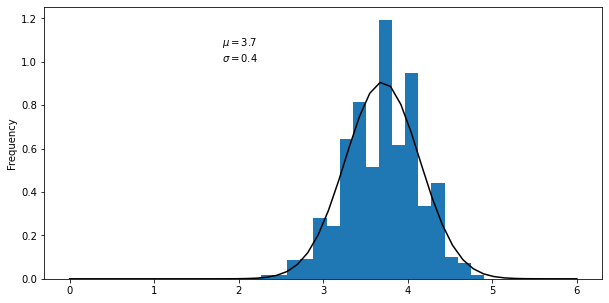

In [19]:
# Plotting the distribution of restaurant ratings
plt.figure(figsize = (10, 5))
zom_rate = zomato.rate
param = stats.norm.fit(zom_rate)   # Fit a normal distribution to the data
x = np.linspace(0, 6)
pdf_fitted = stats.norm.pdf(x, *param)    # Use the fitted paramters to create the y datapoints
plt.text(x=np.min(zom_rate), y=1.0, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='k')
zom_rate.plot.hist(bins=20, density=True, legend=None)
plt.plot(x, pdf_fitted, color='k')
plt.show()

In [20]:
#PERFORMING REGRESSION
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

In [21]:
#Determining the proportion of variance using Train Test Spilt Regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
reg = LinearRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)*100

27.351655171030398

In [22]:
#Determining the proportion of variance using Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
Dtree=DecisionTreeRegressor(min_samples_leaf=.0001)
Dtree.fit(x_train,y_train)
y_predict=Dtree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)*100

85.35694739696976

In [23]:
Decisionpred =pd.DataFrame({ "actual": y_test, "pred": y_predict })
Decisionpred

,actual,pred
6821,4.0,3.950000
21541,3.7,3.700000
34583,4.0,4.000000
5162,3.4,3.400000
32463,4.5,4.475000
...,...,...
39043,4.3,4.300000
31686,2.9,2.983333
22787,3.5,3.512500
24279,3.1,3.100000


In [24]:
#Determining the proportion of variance using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
Rforest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
Rforest.fit(x_train,y_train)
y_predict=Rforest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)*100

87.74279501872894

In [25]:
Randpred =pd.DataFrame({ "actual": y_test, "pred": y_predict })
Randpred

,actual,pred
6821,4.0,3.972361
21541,3.7,3.702063
34583,4.0,3.985348
5162,3.4,3.401136
32463,4.5,4.457503
...,...,...
39043,4.3,4.275760
31686,2.9,3.245456
22787,3.5,3.494448
24279,3.1,3.108035


In [26]:
#Determining the accuracy using MAPE
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_predict)*100
mape

8.647385405309722